In [1]:
import numpy as np
import pandas as pd
import os
from pathlib import Path
from keras.preprocessing import image
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv(r"./Train/train.csv")
test = pd.read_csv(r"./Test/test.csv")

In [3]:
new_train = train.values
new_test = test.values

In [4]:
p = Path("./Train/Images")

img_data = []
labels = []

dirs = p.glob("*")

labels_dir = {"Pikachu":0,"Bulbasaur":1,"Charmander":2}

for img_path in dirs:
    img_name = str(img_path).split("\\")[-1]
    index = np.where(new_train==img_name)[0][0]
    label = new_train[index][1]
    
    img = image.load_img(img_path,target_size=(40,40))
    img_array = image.img_to_array(img)
    img_data.append(img_array)
    labels.append(labels_dir[label])

C:\Users\nikhil\Anaconda3\lib\site-packages\PIL\Image.py:993: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [5]:
img_data = np.array(img_data,dtype='float32')/255.0
labels = np.array(labels)
print(img_data.shape,labels.shape)

(304, 40, 40, 3) (304,)


In [6]:
import random

compressed = list(zip(img_data,labels))
random.shuffle(compressed)

img_data[:],labels[:] = zip(*compressed)

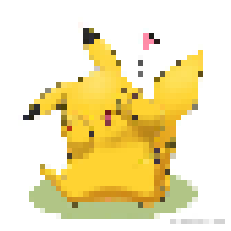

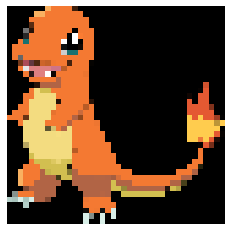

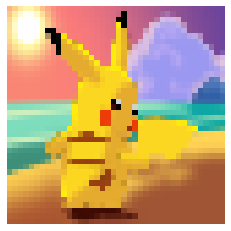

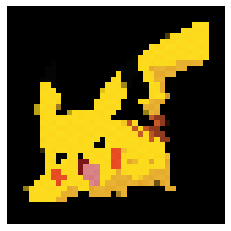

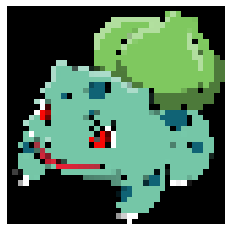

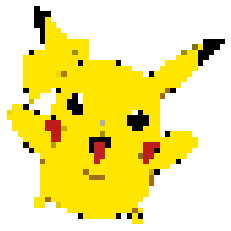

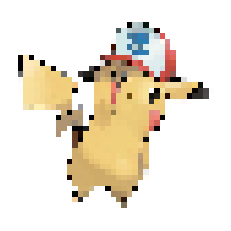

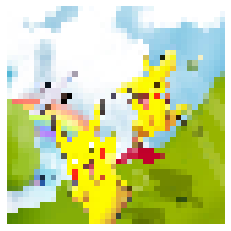

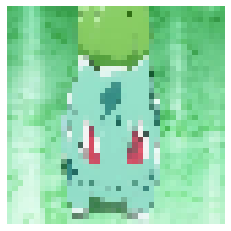

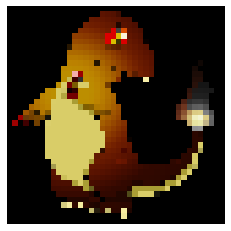

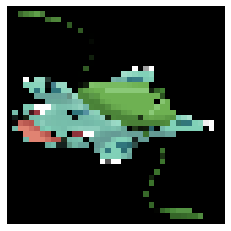

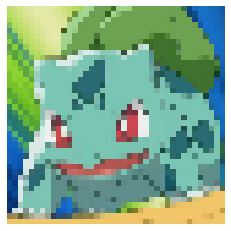

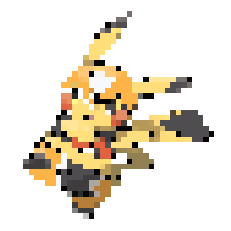

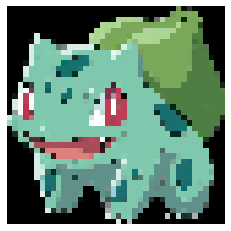

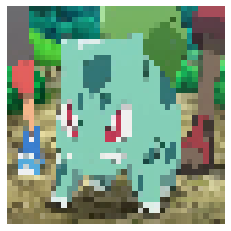

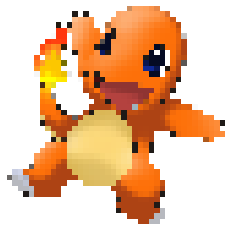

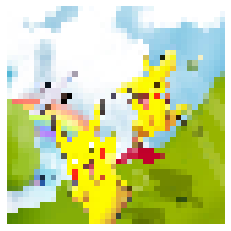

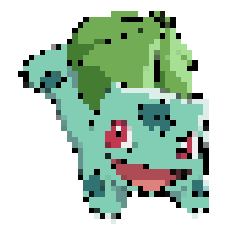

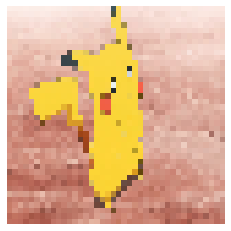

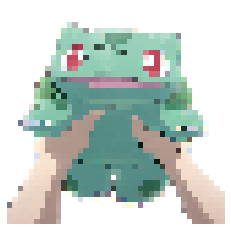

In [7]:
def drawing(img):
    plt.imshow(img)
    plt.axis("off")
    plt.show()
    return

for i in range(20):
    drawing(img_data[i])

In [8]:
M = img_data.shape[0]
img_data = img_data.reshape((M,-1))

In [9]:
def softmax(a):
    e_pa = np.exp(a)
    ans = e_pa/np.sum(e_pa,axis=1,keepdims=True)
    return ans

In [10]:
class NeuralNetwork:
    
    def __init__(self,input_size,layers,output_size):
        np.random.seed(0)
        
        model = {}
        
        model['W1'] = np.random.randn(input_size,layers[0])
        model['b1'] = np.zeros((1,layers[0]))
        
        model['W2'] = np.random.randn(layers[0],layers[1])
        model['b2'] = np.zeros((1,layers[1]))
        
        model['W3'] = np.random.randn(layers[1],output_size)
        model['b3'] = np.zeros((1,output_size))
        
        self.model = model
        self.activation_output = None
        
    def forward(self,x):
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        b1,b2,b3 = self.model['b1'],self.model['b2'],self.model['b3']
        
        z1 = np.dot(x,W1)+b1
        a1 = np.tanh(z1)
        
        z2 = np.dot(a1,W2)+b2
        a2 = np.tanh(z2)
        
        z3 = np.dot(a2,W3) + b3
        y_ = softmax(z3)
        
        self.activation_output = (a1,a2,y_)
        return y_
    
    def backward(self,x,y,learning_rate=0.001):
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        b1,b2,b3 = self.model['b1'],self.model['b2'],self.model['b3']
        a1,a2,y_ = self.activation_output
        
        delta3 = y_-y
        dw3 = np.dot(a2.T,delta3)
        db3 = np.sum(delta3,axis=0)
        
        delta2 = (1-np.square(a2))*np.dot(delta3,W3.T)
        dw2 = np.dot(a1.T,delta2)
        db2 = np.sum(delta2,axis=0)
        
        delta1 = (1-np.square(a1))*np.dot(delta2,W2.T)
        dw1 = np.dot(x.T,delta1)
        db1 = np.sum(delta1,axis=0)
        
        self.model['W1'] -= learning_rate*dw1
        self.model['b1'] -= learning_rate*db1
        
        self.model['W2'] -= learning_rate*dw2
        self.model['b2'] -= learning_rate*db2
        
        self.model['W3'] -= learning_rate*dw3
        self.model['b3'] -= learning_rate*db3
        
    def predict(self,x):
        y_out = self.forward(x)
        return np.argmax(y_out,axis=1)
    
    def summary(self):
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        a1,a2,y_ = self.activation_outputs
        
        print("W1",W1.shape)
        print("A1",a1.shape)
        
        print("W2",W2.shape)
        print("A2",a2.shape)
        
        print("W3",W3.shape)
        print("Y_",y_.shape)

In [11]:
def loss(y_hot,p):
    l = -np.mean(y_hot*np.log(p))
    return l

def one_hot(y,depth):
    m = y.shape[0]
    
    y_hot = np.zeros((m,depth))
    y_hot[np.arange(m),y] = 1
    
    return y_hot

In [12]:
model = NeuralNetwork(input_size = img_data.shape[1],layers=[200,80],output_size = 3)

In [13]:
def train(x,y,model,learning_rate=0.001,maxItr=500,logs=True):
    training_loss = []
    
    classes = 3
    y_hot = one_hot(y,classes)
    
    for ix in range(maxItr):
        
        y_ = model.forward(x)
        l = loss(y_hot,y_)
        training_loss.append(l)
        model.backward(x,y_hot,learning_rate)
        
        if(logs and ix%20==0):
            print("Epoch %d Loss %.4f"%(ix,l))
            
    return training_loss

In [14]:
losses = train(img_data,labels,model,0.0002,1500)

Epoch 0 Loss 2.6499
Epoch 20 Loss 0.5431
Epoch 40 Loss 0.3657
Epoch 60 Loss 0.2912
Epoch 80 Loss 0.2668
Epoch 100 Loss 0.2521
Epoch 120 Loss 0.2426
Epoch 140 Loss 0.2314
Epoch 160 Loss 0.2250
Epoch 180 Loss 0.2182
Epoch 200 Loss 0.2131
Epoch 220 Loss 0.2065
Epoch 240 Loss 0.2011
Epoch 260 Loss 0.1966
Epoch 280 Loss 0.1930
Epoch 300 Loss 0.1897
Epoch 320 Loss 0.1865
Epoch 340 Loss 0.1844
Epoch 360 Loss 0.1803
Epoch 380 Loss 0.1781
Epoch 400 Loss 0.1766
Epoch 420 Loss 0.1753
Epoch 440 Loss 0.1740
Epoch 460 Loss 0.1728
Epoch 480 Loss 0.1716
Epoch 500 Loss 0.1708
Epoch 520 Loss 0.1697
Epoch 540 Loss 0.1690
Epoch 560 Loss 0.1679
Epoch 580 Loss 0.1674
Epoch 600 Loss 0.1663
Epoch 620 Loss 0.1659
Epoch 640 Loss 0.1652
Epoch 660 Loss 0.1645
Epoch 680 Loss 0.1639
Epoch 700 Loss 0.1637
Epoch 720 Loss 0.1632
Epoch 740 Loss 0.1627
Epoch 760 Loss 0.1623
Epoch 780 Loss 0.1624
Epoch 800 Loss 0.1619
Epoch 820 Loss 0.1618
Epoch 840 Loss 0.1615
Epoch 860 Loss 0.1613
Epoch 880 Loss 0.1611
Epoch 900 Loss 0

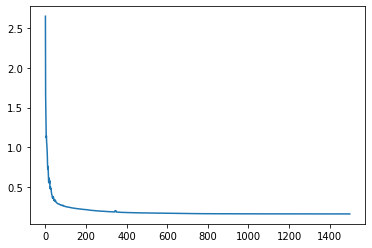

In [15]:
plt.plot(losses)
plt.show()

In [16]:
outputs = model.predict(img_data)

In [17]:
training_accuracy = np.sum(outputs==labels)/labels.shape[0]

In [18]:
print(training_accuracy)

0.7236842105263158


In [19]:
outputs==labels

array([ True,  True,  True,  True, False,  True,  True,  True,  True,
       False, False,  True,  True, False, False,  True,  True, False,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True, False,  True,  True,  True, False,  True, False,
        True,  True, False,  True,  True,  True,  True,  True,  True,
       False, False,  True,  True,  True, False, False,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True, False, False,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True, False, False,  True,  True,
        True,  True,  True, False,  True,  True,  True, False, False,
        True,  True,  True, False, False, False,  True,  True, False,
        True,  True, False,  True, False, False,  True, False,  True,
        True, False,  True,  True, False, False,  True,  True, False,
        True,  True,